In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm.auto import tqdm

import torch
import torch.nn as nn
import torchvision

from dataloading.nvidia import NvidiaSpringTrainDataset, NvidiaTrainDataset, NvidiaValidationDataset
from network import PilotNet
from trainer import Trainer

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
root_path = Path("/home/romet/data2/datasets/rally-estonia/dataset")

trainset_spring = NvidiaSpringTrainDataset(root_path)
len(trainset_spring)

/home/romet/data2/datasets/rally-estonia/dataset/2021-05-20-12-36-10_e2e_sulaoja_20_30: 12025
/home/romet/data2/datasets/rally-estonia/dataset/2021-05-20-12-36-10_e2e_sulaoja_20_30: 12025
/home/romet/data2/datasets/rally-estonia/dataset/2021-05-20-12-43-17_e2e_sulaoja_20_30: 6809
/home/romet/data2/datasets/rally-estonia/dataset/2021-05-20-12-43-17_e2e_sulaoja_20_30: 6809
/home/romet/data2/datasets/rally-estonia/dataset/2021-05-20-12-51-29_e2e_sulaoja_20_30: 5393
/home/romet/data2/datasets/rally-estonia/dataset/2021-05-20-12-51-29_e2e_sulaoja_20_30: 5393
/home/romet/data2/datasets/rally-estonia/dataset/2021-05-20-13-44-06_e2e_sulaoja_10_10: 3833
/home/romet/data2/datasets/rally-estonia/dataset/2021-05-20-13-44-06_e2e_sulaoja_10_10: 3833
/home/romet/data2/datasets/rally-estonia/dataset/2021-05-20-13-51-21_e2e_sulaoja_10_10: 3798
/home/romet/data2/datasets/rally-estonia/dataset/2021-05-20-13-51-21_e2e_sulaoja_10_10: 3798
/home/romet/data2/datasets/rally-estonia/dataset/2021-05-20-13-59-00

509594

In [34]:
trainset_autumn = NvidiaTrainDataset(root_path)
len(trainset_autumn)

/home/romet/data2/datasets/rally-estonia/dataset/2021-05-20-12-36-10_e2e_sulaoja_20_30: 12025
/home/romet/data2/datasets/rally-estonia/dataset/2021-05-20-12-36-10_e2e_sulaoja_20_30: 12025
/home/romet/data2/datasets/rally-estonia/dataset/2021-05-20-12-43-17_e2e_sulaoja_20_30: 6809
/home/romet/data2/datasets/rally-estonia/dataset/2021-05-20-12-43-17_e2e_sulaoja_20_30: 6809
/home/romet/data2/datasets/rally-estonia/dataset/2021-05-20-12-51-29_e2e_sulaoja_20_30: 5393
/home/romet/data2/datasets/rally-estonia/dataset/2021-05-20-12-51-29_e2e_sulaoja_20_30: 5393
/home/romet/data2/datasets/rally-estonia/dataset/2021-05-20-13-44-06_e2e_sulaoja_10_10: 3833
/home/romet/data2/datasets/rally-estonia/dataset/2021-05-20-13-44-06_e2e_sulaoja_10_10: 3833
/home/romet/data2/datasets/rally-estonia/dataset/2021-05-20-13-51-21_e2e_sulaoja_10_10: 3798
/home/romet/data2/datasets/rally-estonia/dataset/2021-05-20-13-51-21_e2e_sulaoja_10_10: 3798
/home/romet/data2/datasets/rally-estonia/dataset/2021-05-20-13-59-00

/home/romet/data2/datasets/rally-estonia/dataset/2021-10-25-17-06-34_e2e_rec_ss2_arula_back: 43298
/home/romet/data2/datasets/rally-estonia/dataset/2021-10-25-17-06-34_e2e_rec_ss2_arula_back: 43298


1321006

In [35]:
validset = NvidiaValidationDataset(root_path)
len(validset)
validloader = torch.utils.data.DataLoader(validset, batch_size=64, shuffle=False,
                                         num_workers=32, pin_memory=True, persistent_workers=True)
len(validset)

/home/romet/data2/datasets/rally-estonia/dataset/2021-05-28-15-19-48_e2e_sulaoja_20_30: 10708
/home/romet/data2/datasets/rally-estonia/dataset/2021-05-28-15-19-48_e2e_sulaoja_20_30: 10708
/home/romet/data2/datasets/rally-estonia/dataset/2021-06-07-14-20-07_e2e_rec_ss6: 25836
/home/romet/data2/datasets/rally-estonia/dataset/2021-06-07-14-20-07_e2e_rec_ss6: 25836
/home/romet/data2/datasets/rally-estonia/dataset/2021-06-07-14-06-31_e2e_rec_ss6: 3003
/home/romet/data2/datasets/rally-estonia/dataset/2021-06-07-14-06-31_e2e_rec_ss6: 3003
/home/romet/data2/datasets/rally-estonia/dataset/2021-06-07-14-09-18_e2e_rec_ss6: 4551
/home/romet/data2/datasets/rally-estonia/dataset/2021-06-07-14-09-18_e2e_rec_ss6: 4551
/home/romet/data2/datasets/rally-estonia/dataset/2021-06-07-14-36-16_e2e_rec_ss6: 25368
/home/romet/data2/datasets/rally-estonia/dataset/2021-06-07-14-36-16_e2e_rec_ss6: 25368
/home/romet/data2/datasets/rally-estonia/dataset/2021-09-24-14-03-45_e2e_rec_ss11_backwards: 25172
/home/romet/d

222380

In [36]:
df = pd.concat([trainset_autumn.frames, validset.frames])
print(len(df))

1543386


In [37]:
len(df[df.turn_signal==1])

1475623

In [38]:
len(df[df.turn_signal==2])

34557

In [39]:
len(df[df.turn_signal==0])

33206

In [40]:
len(df[df.turn_signal==1]) / len(df)

0.9560945868369934

In [41]:
len(df[df.turn_signal==2]) / len(df)

0.022390380630639386

In [42]:
len(df[df.turn_signal==0]) / len(df)

0.021515032532367147

In [43]:
df["turn_signal"].fillna(1.0, inplace=True) 
df["turn_signal"] = df["turn_signal"].astype(int)
df["turn_signal_next"] = df.shift(-1).turn_signal

In [44]:
len(df[(df.turn_signal==1) & (df.turn_signal_next==2)])

145

In [45]:
len(df[(df.turn_signal==1) & (df.turn_signal_next==0)])

139

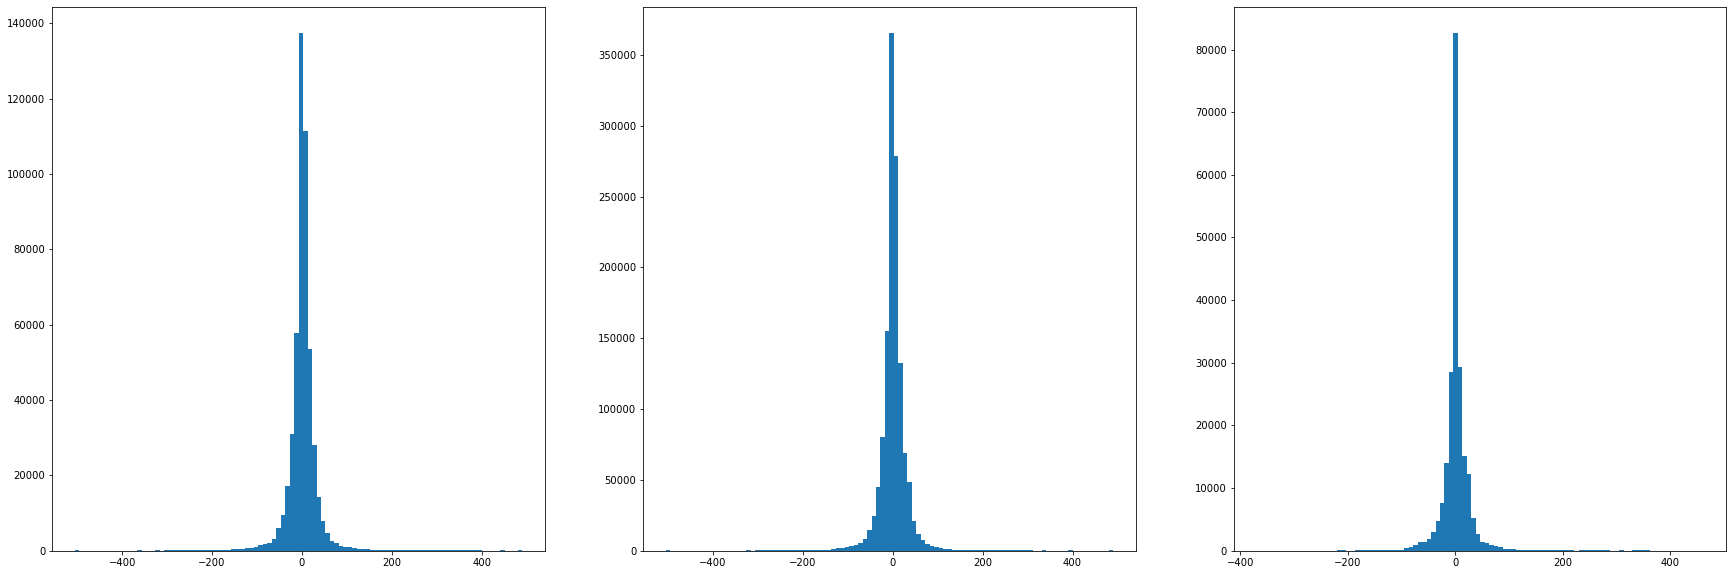

In [46]:

train_spring = trainset_spring.frames.steering_angle / np.pi * 180
train_autumn = trainset_autumn.frames.steering_angle / np.pi * 180
valid_steering = validset.frames.steering_angle / np.pi * 180

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.hist(train_spring, bins=100)
ax2.hist(train_autumn, bins=100)
ax3.hist(valid_steering, bins=100);

In [ ]:
vahi1 = PilotNet()
vahi1.load_state_dict(torch.load(f"models/20211019015910_spring-v1/best.pt"))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vahi1 = vahi1.to(device);

In [ ]:
trainer = Trainer()
metrics = trainer.calculate_open_loop_metrics(vahi1, validloader, 30)
metrics

In [ ]:
vahi2 = PilotNet()
vahi2.load_state_dict(torch.load(f"models/20211019152624_autumn-v1/best.pt"))
vahi2 = vahi2.to(device);

In [ ]:
metrics = trainer.calculate_open_loop_metrics(vahi2, validloader, 30)
metrics

In [ ]:
wide2 = PilotNet()
wide2.load_state_dict(torch.load(f"models/20211019114940_spring-v2/best.pt"))
wide2 = wide2.to(device)
metrics = trainer.calculate_open_loop_metrics(wide2, validloader, 30)
metrics

In [ ]:
def calculate_errors(model, dataloader, trainer):
    predictions = trainer.predict(model, dataloader)
    predicted_degrees = np.array(predictions) / np.pi * 180
    true_degrees = dataloader.dataset.frames.steering_angle.to_numpy() / np.pi * 180
    errors = true_degrees - predicted_degrees
    return errors, predicted_degrees, true_degrees

In [ ]:
errors, predicted_degrees, true_degrees = calculate_errors(wide2, validloader, trainer)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 20))
ax1.hist(errors, bins=200)
ax1.set_xlim([-400, 400])
ax1.set_title("Errors")
ax2.hist(predicted_degrees, bins=200)
ax2.set_xlim([-400, 400])
ax2.set_title("Predicted degrees")
ax3.hist(true_degrees, bins=200)
ax3.set_xlim([-400, 400])
ax3.set_title("True degrees");

In [ ]:
errors, predicted_degrees, true_degrees = calculate_errors(vahi2, validloader, trainer)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 20))
ax1.hist(errors, bins=200)
ax1.set_xlim([-400, 400])
ax1.set_title("Errors")
ax2.hist(predicted_degrees, bins=200)
ax2.set_xlim([-400, 400])
ax2.set_title("Predicted degrees")
ax3.hist(true_degrees, bins=200)
ax3.set_xlim([-400, 400])
ax3.set_title("True degrees");

In [ ]:
errors, predicted_degrees, true_degrees = calculate_errors(vahi1, validloader, trainer)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 20))
ax1.hist(errors, bins=200)
ax1.set_xlim([-400, 400])
ax1.set_title("Errors")
ax2.hist(predicted_degrees, bins=200)
ax2.set_xlim([-400, 400])
ax2.set_title("Predicted degrees")
ax3.hist(true_degrees, bins=200)
ax3.set_xlim([-400, 400])
ax3.set_title("True degrees");